In [80]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
import plotly.express as px

# Setting pandas to display columns
pd.set_option('display.max_columns', None)

In [81]:
nfl_small2_end_of_drive = pd.read_csv('nfl_small_end_of_drive.csv',index_col=1,\
    dtype= {'ARI' : 'str','ATL' : 'str', 'BAL' : 'str', 'BUF' : 'str', 'CAR' : 'str',
             'CHI' : 'str', 'CIN' : 'str', 'CLE' : 'str', 'DAL' : 'str', 'DEN' : 'str',
             'DET' : 'str', 'GB' : 'str', 'HOU' : 'str', 'IND' : 'str', 'JAX' : 'str',
             'KC' : 'str', 'LA' : 'str', 'LAC' : 'str', 'MIA' : 'str', 'MIN' : 'str',
             'NE' : 'str', 'NO' : 'str', 'NYG' : 'str','NYJ' : 'str', 'OAK' : 'str',
             'PHI' : 'str', 'PIT' : 'str','SEA' : 'str', 'SF' : 'str', 'TB' : 'str',
             'TEN' : 'str', 'WAS' : 'str'})


In [82]:
nfl_small2_end_of_drive.head()

,index,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,year,diff,Estimated_Time,Estimated Time (EST),Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Unnamed: 0_y,Wind Direction (deg),Wind Speed (km/h),added_time,game_name,end_of_drive,end_of_game,INT,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAX,KC,LA,LAC,MIA,MIN,NE,NO,NYG,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WAS,week
play_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36,270409,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,NE,35.0,1,0,NaN,0.0,NE 35,0,0,S.Gostkowski kicks 65 yards from NE 35 to end ...,kickoff,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
51,270410,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,80.0,1,0,1.0,0.0,PIT 20,10,18,(15:00) De.Williams right tackle to PIT 38 for...,run,18.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
72,270411,2015091000,2015-09-10 00:00:00,14:21,861.0,1761.0,3561.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,62.0,1,0,1.0,0.0,PIT 38,10,31,(14:21) B.Roethlisberger pass short right to A...,pass,9.0,short,-4.0,13.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-09-10 20:40:00,2015.0,0 days 00:01:57.000000000,2015-09-10 20:41:57,2015-09-10 20:41:57,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
101,270412,2015091000,2015-09-10 00:00:00,14:04,844.0,1744.0,3544.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,53.0,1,0,2.0,0.0,PIT 47,1,31,(14:04) De.Williams right guard to NE 49 for 4...,run,4.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:02:48.000000000,2015-09-10 20:42:48,2015-09-10 20:42:48,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1
122,270413,2015091000,2015-09-10 00:00:00,13:26,806.0,1706.0,3506.0,Half1,0,1,NE,PIT,PIT,away,NE,NE,49.0,1,0,1.0,0.0,NE 49,10,45,(13:26) B.Roethlisberger pass short right to H...,pass,14.0,short,9.0,5.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-09-10 20:40:00,2015.0,0 days 00:04:42.000000000,2015-09-10 20:44:42,2015-09-10 20:44:42,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-0

In [83]:
# Getting teams to add team matrix for easier filtering
teams = list(nfl_small2_end_of_drive.groupby('posteam').sum().index)
teams[:4]

['ARI', 'ATL', 'BAL', 'BUF']

In [84]:
nfl_small2_end_of_drive.year.unique()

array([2015., 2016., 2017., 2018.])

In [85]:
# Creating Home and Away Win Columns
nfl_small2_end_of_drive['home_team_win'] = np.where(nfl_small2_end_of_drive['total_home_score']\
                              > nfl_small2_end_of_drive['total_away_score'],1,0)

nfl_small2_end_of_drive['away_team_win'] = np.where(nfl_small2_end_of_drive['total_home_score']\
                              < nfl_small2_end_of_drive['total_away_score'],1,0)

In [86]:
sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2015) &\
                                            (nfl_small2_end_of_drive['CLE'] == 'H')
                                           ]['home_team_win'])

2

In [87]:
# Team wins overall for sorting
team_wins_overall = []
years = [2015,2016,2017,2018]
year_list = []
team_list = []

for team in teams:
    for year in years:
        home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'H')
                                               ]['home_team_win'])

        away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'A')
                                               ]['away_team_win'])

        # Due to lack of data, normalizing 2018 to 16 week season
        if year == 2018:
            all_wins = np.round((home_wins + away_wins) * 16/14,0)
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)
            
        else:
            all_wins = home_wins + away_wins
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)

team_by_wins = pd.DataFrame({'team':team_list,'wins':team_wins_overall,'year':year_list}).sort_values(by=['wins'])

In [88]:
team_win_list = list(team_by_wins.groupby('team').agg({'wins':'sum'}).sort_values(by=['wins']).index)

In [89]:
# Team wins overall for sorting
team_wins_overall = []
years = [2015,2016,2017,2018]
year_list = []
team_list = []

for team in team_win_list:
    for year in years:
        home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'H')
                                               ]['home_team_win'])

        away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                (nfl_small2_end_of_drive['year'] == year) &\
                                                (nfl_small2_end_of_drive[team] == 'A')
                                               ]['away_team_win'])

        # Due to lack of data, normalizing 2018 to 16 week season
        if year == 2018:
            all_wins = np.round((home_wins + away_wins) * 16/14,0)
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)
            
        else:
            all_wins = home_wins + away_wins
            team_wins_overall.append(round(all_wins,0))
            year_list.append(year)
            team_list.append(team)

team_by_wins = pd.DataFrame({'team':team_list,'wins':team_wins_overall,'year':year_list})

In [90]:
# Could change this to mathematical bins
# bins = [0, 7, 10, 17]
labels = ['5 or Less', 'Between 6 and 9','10+ Wins']
team_by_wins['binned'] = pd.cut(team_by_wins['wins'], bins=3, labels=labels)

team_by_wins

,team,wins,year,binned
0,CLE,3.0,2015,5 or Less
1,CLE,1.0,2016,5 or Less
2,CLE,0.0,2017,5 or Less
3,CLE,7.0,2018,Between 6 and 9
4,SF,5.0,2015,5 or Less
...,...,...,...,...
123,KC,13.0,2018,10+ Wins
124,NE,12.0,2015,10+ Wins
125,NE,14.0,2016,10+ Wins
126,NE,13.0,2017,10+ Wins


In [91]:
team_by_wins.wins.describe() #.plot(kind='hist',bins=3)

count    128.000000
mean       7.960938
std        3.038862
min        0.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       15.000000
Name: wins, dtype: float64

In [92]:
fig = go.Figure(data=[go.Bar(name='Total', x = team_by_wins['team'], y = team_by_wins['wins'])])

layout = go.Layout(
    title = 'Total Wins By Team (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Team'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

For the four years from 2015 thru 2018, we can naturally break teams into groups of successfulness, start with our top 7. Then we have quite a few middle of the pack teams, and an obvious group of bottom dwellers. One of our team member's favorite being the Cleveland Browns...

In [93]:
# Team wins by year
team_wins_2015 = []
teams = list(team_by_wins['team'].unique())
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2015) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2015) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = home_wins + away_wins
    
    team_wins_2015.append(round(all_wins,0))


team_wins_2016 = []
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2016) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2016) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = home_wins + away_wins
    
    team_wins_2016.append(round(all_wins,0))

team_wins_2017 = []
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2017) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2017) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = home_wins + away_wins
    
    team_wins_2017.append(round(all_wins,0))
    
team_wins_2018 = []
for team in teams:
    home_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                            (nfl_small2_end_of_drive['year'] == 2018) &\
                                            (nfl_small2_end_of_drive[team] == 'H')
                                           ]['home_team_win'])

    away_wins = sum(nfl_small2_end_of_drive[(nfl_small2_end_of_drive['end_of_game'] == 1) &\
                                                 (nfl_small2_end_of_drive['year'] == 2018) &\
                                                 (nfl_small2_end_of_drive[team] == 'A')
                                           ]['away_team_win'])
    
    all_wins = (home_wins + away_wins)*16/14
    
    team_wins_2018.append(round(all_wins,0))

In [94]:
fig = go.Figure(data=[go.Bar(name='2015', x = teams, y = team_wins_2015),\
                      go.Bar(name='2016', x = teams, y = team_wins_2016),\
                      go.Bar(name='2017', x = teams, y = team_wins_2017),\
                      go.Bar(name='2018', x = teams, y = team_wins_2018)])

layout = go.Layout(
    title = 'Total Wins By Year (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
    
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Year'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        barmode='group',width=1000, height=600)
fig

We see mostly steady win totals, but not some teams have over or underpreformed. We are assuming Total Wins over a four year period is indicative of how good a team is.

-Needs to be corrected for proper win totals?   
-Needs dividers between teams?

In [95]:
team_by_wins.head()

,team,wins,year,binned
0,CLE,3.0,2015,5 or Less
1,CLE,1.0,2016,5 or Less
2,CLE,0.0,2017,5 or Less
3,CLE,7.0,2018,Between 6 and 9
4,SF,5.0,2015,5 or Less


In [96]:
x2015 = team_by_wins[team_by_wins['year']==2015].groupby('binned').count().index
y2015 = team_by_wins[team_by_wins['year']==2015].groupby('binned').count()['team'].values

x2016 = team_by_wins[team_by_wins['year']==2016].groupby('binned').count().index
y2016 = team_by_wins[team_by_wins['year']==2016].groupby('binned').count()['team'].values

x2017 = team_by_wins[team_by_wins['year']==2017].groupby('binned').count().index
y2017 = team_by_wins[team_by_wins['year']==2017].groupby('binned').count()['team'].values

x2018 = team_by_wins[team_by_wins['year']==2018].groupby('binned').count().index
y2018 = team_by_wins[team_by_wins['year']==2018].groupby('binned').count()['team'].values

In [97]:
fig = go.Figure(data=[go.Bar(name='2015', x = x2015, y = y2015),\
                      go.Bar(name='2016', x = x2016, y = y2016),\
                      go.Bar(name='2017', x = x2017, y = y2017),\
                      go.Bar(name='2018', x = x2018, y = y2018)])

layout = go.Layout(
    title = 'Total Wins By Year (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
    
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Year'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        barmode='group',width=1000, height=600)
fig

<h2>Creating end of game summary metrics</h2>

In [98]:
nfl_end_of_game = pd.read_csv('nfl_end_of_game.csv',index_col=0)
nfl_end_of_game.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less
2,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less
3,2015091302,JAX,CAR,9,19,255.0,253.0,21.0,33.0,44.0,33.0,4.0,1.0,2.0,46.5,1.0,4.0,2.0,169.0,158.0,96.0,107.0,0.0,2.10,2.0,-3.0,0.5,0.5,3.840909,4.571429,4.787879,3.242424,2015,5 or Less
4,2015091303,WAS,MIA,10,16,290.0,264.0,36.0,17.0,32.0,37.0,4.0,2.0,2.0,22.0,1.0,1.0,1.0,188.0,182.0,162.0,75.0,0.0,0.89,26.0,-2.0,0.5,1.0,5.875000,4.500000,4.918919,4.411765,2015,Between 6 and 9


In [99]:
nfl_end_of_game.columns

Index(['game_id', 'Team', 'team_against', 'score', 'score_against', 'yards',
       'yards_against', 'run_plays', 'run_plays_against', 'pass_plays',
       'pass_plays_against', 'to_for', 'to_against', 'fg_at', 'avg_kick_dist',
       'fg_md', 'fg_at_against', 'fg_md_against', 'pass_yards',
       'pass_yards_against', 'run_yards', 'run_yards_against', 'win',
       'pass_run_ratio', 'yard_diff', 'to_diff', 'fg_rate', 'fg_rate_against',
       'pass_yds_per_at', 'run_yds_per_at', 'pass_yds_per_at_against',
       'run_yds_per_at_against', 'year', 'binned'],
      dtype='object')

In [122]:
nfl_end_of_game.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN
2,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN
3,2015091302,JAX,CAR,9,19,255.0,253.0,21.0,33.0,44.0,33.0,4.0,1.0,2.0,46.5,1.0,4.0,2.0,169.0,158.0,96.0,107.0,0.0,2.10,2.0,-3.0,0.5,0.5,3.840909,4.571429,4.787879,3.242424,2015,5 or Less,NaN
4,2015091303,WAS,MIA,10,16,290.0,264.0,36.0,17.0,32.0,37.0,4.0,2.0,2.0,22.0,1.0,1.0,1.0,188.0,182.0,162.0,75.0,0.0,0.89,26.0,-2.0,0.5,1.0,5.875000,4.500000,4.918919,4.411765,2015,Between 6 and 9,NaN


In [100]:
# Adding numeric win group to allow for correlation
win_dict = {'36+ Wins':2,'35 or Less':1,'24 or Less':0}
nfl_end_of_game['win_group_num'] = nfl_end_of_game['binned'].map(win_dict)

In [119]:
corr_cols = ['yards','yards_against', 'run_plays', 'run_plays_against', 'pass_plays',\
       'pass_plays_against','yard_diff','to_for', 'to_against', 'to_diff','fg_rate',\
        'fg_rate_against','pass_yds_per_at','pass_run_ratio','run_yds_per_at', 'avg_kick_dist',
             'pass_yds_per_at_against', 'run_yds_per_at_against']

In [120]:
corr_df = nfl_end_of_game[corr_cols].apply(lambda x: x.corr(nfl_end_of_game.win)).sort_values(kind="quicksort")

In [121]:
fig = go.Figure(data=[go.Bar(name='Corr', x = corr_df.index, y = corr_df.values)])

layout = go.Layout(
    title = 'Variables by Win Correlation',
    xaxis= dict(title= 'Variable',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Correlation',ticklen= 5,zeroline= False)
)

fig.update_layout(
    title={
        'text':'<b>'+'Variables by Win Correlation'+'</b>'+'<br>(Based on Individual Game Results)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig

As you can imagine, factors such as Total Yards and Yard Differential play a factor in wins, but so does turnovers (TOs), Pass to Run Ratio, and Pass Yards Per Attempt, which may change as weather changes

<h2>Keying in on some individual variables</h2>

In [104]:
color_dict = {'10+ Wins': 'rgb(215,48,39)', 'Between 6 and 9': 'rgb(253,253,32)','5 or Less': 'rgb(42,55,230)'}
color_group = nfl_end_of_game['binned'].map(color_dict)

In [105]:
nfl_end_of_game.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN
2,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN
3,2015091302,JAX,CAR,9,19,255.0,253.0,21.0,33.0,44.0,33.0,4.0,1.0,2.0,46.5,1.0,4.0,2.0,169.0,158.0,96.0,107.0,0.0,2.10,2.0,-3.0,0.5,0.5,3.840909,4.571429,4.787879,3.242424,2015,5 or Less,NaN
4,2015091303,WAS,MIA,10,16,290.0,264.0,36.0,17.0,32.0,37.0,4.0,2.0,2.0,22.0,1.0,1.0,1.0,188.0,182.0,162.0,75.0,0.0,0.89,26.0,-2.0,0.5,1.0,5.875000,4.500000,4.918919,4.411765,2015,Between 6 and 9,NaN


In [106]:
nfl_end_of_game.groupby('binned').agg({'pass_run_ratio':'mean'}).sort_values(by=['binned'])

,pass_run_ratio
binned,
10+ Wins,1.490016
5 or Less,1.714849
Between 6 and 9,1.662046


In [107]:
# Create categorical variable and order for binned
nfl_end_of_game['binned'] = pd.Categorical(nfl_end_of_game['binned'], \
                                        categories=['5 or Less','Between 6 and 9','10+ Wins'],\
                                        ordered=True)

In [108]:
fig = go.Figure()

fig.add_trace(go.Bar(name='pass to run',x=nfl_end_of_game.groupby('binned').agg({'pass_run_ratio':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'pass_run_ratio':'mean'})['pass_run_ratio'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Pass to Run Ratio'+'</b>'+'<br>(Pass Plays / Run Plays)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig

In [109]:
fig = go.Figure()

fig.add_trace(go.Bar(name='TO Margin',x=nfl_end_of_game.groupby('binned').agg({'to_diff':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'to_diff':'mean'})['to_diff'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Turnover Margin'+'</b>'+'<br>(Giveaways Minus Takeways)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig

In [110]:
nfl_end_of_game.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN


In [111]:
fig = go.Figure()

fig.add_trace(go.Bar(name='TO Margin',x=nfl_end_of_game.groupby('binned').agg({'fg_rate':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'fg_rate':'mean'})['fg_rate'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Field Goal Success Rate'+'</b>'+'<br>(Field Goals Made versus Attempted)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig

In [112]:
# Yard Differential
fig = go.Figure()

fig.add_trace(go.Bar(name='Yard Diff',x=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'})['yard_diff'])
             )

fig.update_layout(
    title={
        'text':'<b>'+'Game Average Yard Differential'+'</b>'+'<br>(Yards Gained Minus Yard Given Up)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_xaxes(range=[-.5, 2.5])
fig.update_yaxes(range=[-40, 40])

fig.add_shape(
            type="line",
            xref="paper",
            yref="paper",
            x0=0.033,
            y0=.1,
            x1=.3,
            y1=.1,
            line=dict(
                color="DarkOrange",
                width=3,
            ),
        )

fig

In [113]:
nfl_end_of_game.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN


In [114]:
# Yard Differential
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(name='Yard Diff',x=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yard_diff':'mean'})['yard_diff']),
                    secondary_y=False
             )

fig.add_trace(go.Scatter(name='Yards Gained',x=nfl_end_of_game.groupby('binned').agg({'yards':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yards':'mean'})['yards'],yaxis='y2'),
                        secondary_y=True
             )

fig.add_trace(go.Scatter(name='Yards Given Up',x=nfl_end_of_game.groupby('binned').agg({'yards_against':'mean'}).index, 
                     y=nfl_end_of_game.groupby('binned').agg({'yards_against':'mean'})['yards_against']*-1,yaxis='y2'),
                        secondary_y=True
             )

fig.update_layout(
    title={
        'text':'<b>'+'Game Average Yard Differential'+'</b>'+'<br>(Yards Gained Minus Yard Given Up)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    
    )

fig

<h2>Weather Analysis</h2>

<h3>From USGS</h3><br>
https://water.usgs.gov/edu/activity-howmuchrain-metric.html
<b>Rates of rainfall</b>
1. Drizzle, very small droplets.<br>
2. Slight (fine) drizzle: Detectable as droplets only on the face, car windscreens and windows.<br>
3. Moderate drizzle: Windows and other surfaces stream with water.<br>
4. Heavy (thick) drizzle: Impairs visibility and is measurable in a raingauge, rates up to 1 mm per hour.<br>
5. Rain, drops of appreciable size and may be described as small to large drops. It is possible to have rain drops within drizzle!<br>
6. Slight rain: Less than 0.5 mm per hour.<br>
7. Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour.<br>
8. Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour.<br>
9. Very heavy rain: Greater than 8 mm per hour.<br>
10. Slight shower: Less than 2 mm per hour.<br>
11. Moderate shower: Greater than 2 mm, but less than 10 mm per hour.<br>
12. Heavy shower: Greater than 10 mm per hour, but less than 50 mm per hour.<br>
13. Violent shower: Greater than 50 mm per hour.<br>

In [36]:
#Start with end of game stats then go more granular with end of drive if that doesnt work

In [37]:
nfl_end_of_game.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN
1,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN


In [38]:
nfl_small2_end_of_drive.head(3)

,index,game_id,game_date,time,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,qtr,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,drive,sp,down,goal_to_go,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,pass_length,air_yards,yards_after_catch,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,td_team,total_home_score,total_away_score,posteam_score,defteam_score,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,fumble,complete_pass,Start_Time,year,diff,Estimated_Time,Estimated Time (EST),Estimated_Hour,Air Pressure (hPa),City,Dewpoint (°C),Field,Humidity (%),Precipitation (mm),Roof,Team Abbreviation,Temperature (°C),Time (EST),Time (GMT),Unnamed: 0_y,Wind Direction (deg),Wind Speed (km/h),added_time,game_name,end_of_drive,end_of_game,INT,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,DET,GB,HOU,IND,JAX,KC,LA,LAC,MIA,MIN,NE,NO,NYG,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WAS,week,home_team_win,away_team_win
play_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36,270409,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,NE,35.0,1,0,NaN,0.0,NE 35,0,0,S.Gostkowski kicks 65 yards from NE 35 to end ...,kickoff,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1,0,0
51,270410,2015091000,2015-09-10 00:00:00,15:00,900.0,1800.0,3600.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,80.0,1,0,1.0,0.0,PIT 20,10,18,(15:00) De.Williams right tackle to PIT 38 for...,run,18.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-10 20:40:00,2015.0,0 days 00:00:00.000000000,2015-09-10 20:40:00,2015-09-10 20:40:00,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1,0,0
72,270411,2015091000,2015-09-10 00:00:00,14:21,861.0,1761.0,3561.0,Half1,0,1,NE,PIT,PIT,away,NE,PIT,62.0,1,0,1.0,0.0,PIT 38,10,31,(14:21) B.Roethlisberger pass short right to A...,pass,9.0,short,-4.0,13.0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015-09-10 20:40:00,2015.0,0 days 00:01:57.000000000,2015-09-10 20:41:57,2015-09-10 20:41:57,2015-09-10 21:00:00,1010.6,Foxborough,16.1,FieldTurf CORE,87.0,0.3,Open,NE,18.3,2015-09-10 21:00:00,2015-09-11 01:00:00,NaN,30.0,20.5,0,PIT @ NE 2015-09-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,H,0,0,0,0,0,A,0,0,0,0,0,1,0,0


In [50]:
# combining combined_df and nfl_small2 for weather data using average per game for each value

def my_weather_aggfunc(x):
    values = {
        'Temperature (°C)':x['Temperature (°C)'].mean(),
        'Air Pressure (hPa)':x['Air Pressure (hPa)'].mean(),
        'City':x['City'].iloc[0],
        'Field':x['Field'].iloc[0],
        'Roof':x['Roof'].iloc[0], # Added to Joey's code
        'Dewpoint (°C)':x['Dewpoint (°C)'].mean(),
        'Precipitation (mm)':x['Precipitation (mm)'].mean(),
        'Wind Speed (km/h)':x['Wind Speed (km/h)'].mean()
    }
    return pd.Series(values)

weather_avg_df = nfl_small2_end_of_drive.groupby(['game_id']).apply(lambda x: agg_func_for_weather(x))


In [51]:
new_weather_df = pd.DataFrame()
new_weather_df = nfl_small2_end_of_drive.groupby(['game_id']).apply(my_weather_aggfunc)
weather_avg_df = weather_avg_df.fillna(0)

In [123]:
nfl_df = nfl_end_of_game.merge(weather_avg_df, left_on=['game_id'], right_on=['game_id'])
nfl_df.head(3)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h)
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,39.5,2.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,0.5,0.0,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143
2,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716


In [124]:
new_df = nfl_df.copy()

import re

def my_func(x):
    line = re.sub('ideal', '', x)
    if len(line) == 2:
        return 'ideal'
    return line

nfl_df['temp_bin'] = pd.cut(x=nfl_df['Temperature (°C)'], bins=[-np.inf,10,25,np.inf], labels=['cold', 'ideal', 'hot'])
nfl_df['wind_bin'] = pd.cut(x=nfl_df['Wind Speed (km/h)'], bins=[-1,10,np.inf], labels=['ideal', 'windy'])
nfl_df['rain_bin'] = pd.cut(x=nfl_df['Precipitation (mm)'], bins=[-1,0.5,np.inf], labels=['ideal', 'raining'])
nfl_df['weather_bin'] = nfl_df['temp_bin'].astype('str') + ' ' + nfl_df['wind_bin'].astype('str') + ' ' + nfl_df['rain_bin'].astype('str')
nfl_df['weather_bin'] = nfl_df['weather_bin'].apply(lambda x: my_func(x))

nfl_df.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),temp_bin,wind_bin,rain_bin,weather_bin
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,39.5,2.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,0.5,0.0,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
2,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
3,2015091300,GB,CHI,31,23,336.0,416.0,28.0,33.0,23.0,36.0,0.0,1.0,1.0,37.0,1.0,3.0,3.0,189.0,213.0,134.0,189.0,1.0,0.82,-80.0,1.0,1.0,1.0,8.217391,4.785714,5.916667,5.727273,2015,10+ Wins,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
4,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN,22.597207,1018.786034,St. Louis,AstroTurf,Fixed,6.183799,0.000000,10.918436,ideal,windy,ideal,windy


(array([1862.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         120.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

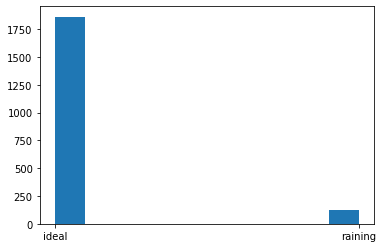

In [125]:
plt.hist(nfl_df.rain_bin)

(array([736., 893., 270.,  62.,  15.,   3.,   2.,   0.,   0.,   1.]),
 array([ 0.3 ,  1.27,  2.24,  3.21,  4.18,  5.15,  6.12,  7.09,  8.06,
         9.03, 10.  ]),
 <a list of 10 Patch objects>)

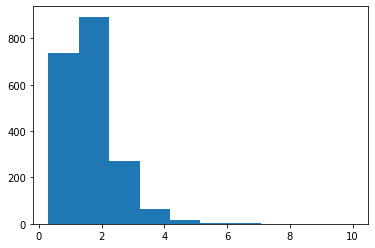

In [126]:
plt.hist(nfl_df.pass_run_ratio)

In [127]:
cum_precip = pd.DataFrame(new_df[(nfl_df['Precipitation (mm)']!=0)&\
                             (nfl_df['Roof']=='Open')]\
                             .sort_values(by=['Precipitation (mm)'],ascending=True)\
                             .groupby('Precipitation (mm)')['Precipitation (mm)'].count().cumsum()/218)

In [128]:
# Given highly skewed precip values, buckets will be fairly skewed
x = cum_precip['Precipitation (mm)'].index
y = cum_precip['Precipitation (mm)'].values

fig = go.Figure()

fig.add_trace(go.Scatter(name='Count of Records',
                 x=x, 
                 y=y)
             )

fig

In [129]:
x = nfl_df.groupby('rain_bin')['pass_run_ratio'].mean().index
y = nfl_df.groupby('rain_bin')['pass_run_ratio'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='Pass/Run Ratio',x=x, y=y)
             )

fig.update_layout(
    title={
        'text':'<b>'+'Affects of Rain on Pass/Run Ratio'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_yaxes(range=[.5, 1.7])

fig

In [130]:
x = nfl_df.groupby('rain_bin')['pass_plays'].mean().index
y = nfl_df.groupby('rain_bin')['pass_plays'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='Average Pass Plays',x=x, y=y)
             )


x = nfl_df.groupby('rain_bin')['run_plays'].mean().index
y = nfl_df.groupby('rain_bin')['run_plays'].mean().values

fig.add_trace(go.Bar(name='Average Run Plays',x=x, y=y)
             )


fig.update_layout(
    title={
        'text':'<b>'+'Affects of Rain on Pass/Run Ratio'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# fig.update_yaxes(range=[.5, 1.7])

fig

In [131]:
nfl_df.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),temp_bin,wind_bin,rain_bin,weather_bin
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,39.5,2.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,0.5,0.0,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
2,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
3,2015091300,GB,CHI,31,23,336.0,416.0,28.0,33.0,23.0,36.0,0.0,1.0,1.0,37.0,1.0,3.0,3.0,189.0,213.0,134.0,189.0,1.0,0.82,-80.0,1.0,1.0,1.0,8.217391,4.785714,5.916667,5.727273,2015,10+ Wins,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
4,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN,22.597207,1018.786034,St. Louis,AstroTurf,Fixed,6.183799,0.000000,10.918436,ideal,windy,ideal,windy


In [132]:
new_df['to_diff'].mean()

0.0

In [133]:
nfl_df.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),temp_bin,wind_bin,rain_bin,weather_bin
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,39.5,2.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,0.5,0.0,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
2,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
3,2015091300,GB,CHI,31,23,336.0,416.0,28.0,33.0,23.0,36.0,0.0,1.0,1.0,37.0,1.0,3.0,3.0,189.0,213.0,134.0,189.0,1.0,0.82,-80.0,1.0,1.0,1.0,8.217391,4.785714,5.916667,5.727273,2015,10+ Wins,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
4,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN,22.597207,1018.786034,St. Louis,AstroTurf,Fixed,6.183799,0.000000,10.918436,ideal,windy,ideal,windy


In [134]:
x = nfl_df.groupby('rain_bin')['fg_rate'].mean().index
y = nfl_df.groupby('rain_bin')['fg_rate'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='fg_rate',x=x, y=y)
             )

fig.update_layout(
    title={
        'text':'<b>'+'Affects of Rain on Field Goal Success Rate'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# fig.update_yaxes(range=[.5, 1.7])

fig

In [135]:
x = nfl_df.groupby('wind_bin')['fg_rate'].mean().index
y = nfl_df.groupby('wind_bin')['fg_rate'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='fg_rate',x=x, y=y)
             )

fig.update_layout(
    title={
        'text':'<b>'+'Affects of Wind on Field Goal Success Rate'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# fig.update_yaxes(range=[.5, 1.7])

fig

In [136]:
x = nfl_df.groupby('rain_bin')['fg_at'].mean().index
y = nfl_df.groupby('rain_bin')['fg_at'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='Rain',x=x, y=y)
             )




fig.update_layout(
    title={
        'text':'<b>'+'Affects of Rain on Field Goal Attempts'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},barmode='group')

# fig.update_yaxes(range=[.5, 1.7])

fig

In [137]:
x = nfl_df.groupby('wind_bin')['fg_at'].mean().index
y = nfl_df.groupby('wind_bin')['fg_at'].mean().values

fig = go.Figure()

fig.add_trace(go.Bar(name='fg_at',x=x, y=y)
             )

fig.update_layout(
    title={
        'text':'<b>'+'Affects of Rain on Field Goal Attempts'+'</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# fig.update_yaxes(range=[.5, 1.7])

fig

In [138]:
nfl_df.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),temp_bin,wind_bin,rain_bin,weather_bin
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,39.5,2.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,0.5,0.0,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
2,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,37.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
3,2015091300,GB,CHI,31,23,336.0,416.0,28.0,33.0,23.0,36.0,0.0,1.0,1.0,37.0,1.0,3.0,3.0,189.0,213.0,134.0,189.0,1.0,0.82,-80.0,1.0,1.0,1.0,8.217391,4.785714,5.916667,5.727273,2015,10+ Wins,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy
4,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,29.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN,22.597207,1018.786034,St. Louis,AstroTurf,Fixed,6.183799,0.000000,10.918436,ideal,windy,ideal,windy


In [139]:
new_df.binned.unique()

[10+ Wins, 5 or Less, Between 6 and 9]
Categories (3, object): [5 or Less < Between 6 and 9 < 10+ Wins]

In [140]:
nfl_df[nfl_df['binned']=='5 or Less'].groupby('rain_bin')['pass_run_ratio'].mean().values

array([1.70755952, 1.82618182])

In [141]:
x1 = nfl_df[nfl_df['binned']=='5 or Less'].groupby('rain_bin')['pass_run_ratio'].mean().index
y1 = nfl_df[nfl_df['binned']=='5 or Less'].groupby('rain_bin')['pass_run_ratio'].mean().values

x2 = nfl_df[nfl_df['binned']=='Between 6 and 9'].groupby('rain_bin')['pass_run_ratio'].mean().index
y2 = nfl_df[nfl_df['binned']=='Between 6 and 9'].groupby('rain_bin')['pass_run_ratio'].mean().values

x3 = nfl_df[nfl_df['binned']=='10+ Wins'].groupby('rain_bin')['pass_run_ratio'].mean().index
y3 = nfl_df[nfl_df['binned']=='10+ Wins'].groupby('rain_bin')['pass_run_ratio'].mean().values

fig = go.Figure(data=[go.Bar(name='5 or Less', x = x1, y = y1),\
                      go.Bar(name='Between 6 and 9', x = x2, y = y2),\
                      go.Bar(name='10+ Wins', x = x3, y = y3)]
                )

layout = go.Layout(
    title = 'Pass to Run Ratio by Win Bucket',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
    
)

fig.update_layout(
    title={
        'text':'<b>'+'Pass to Run Ratio by Win Bucket'+'</b>'+'<br>',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        barmode='group',width=1000, height=600)
fig

We see some marginal differences in Pass/Run Ratio for games with precipitation, but sample size is very low. Also, worse teams seem to pass more in bad weather. This could be contributed to the fact that better teams have a more balanced attack and are able to run more effectively.

In [142]:
nfl_df.head(2)

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,avg_kick_dist,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),temp_bin,wind_bin,rain_bin,weather_bin
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,39.5,0.0,4.0,2.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.0,0.5,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,39.5,2.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,0.5,0.0,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy


In [143]:
wind_df = pd.DataFrame(nfl_df[['Wind Speed (km/h)','avg_kick_dist']]).sort_values(by=['Wind Speed (km/h)'])
wind_df.head()

,Wind Speed (km/h),avg_kick_dist
779,0.0,NaN
1471,0.0,42.80
1505,0.0,32.00
138,0.0,38.75
139,0.0,38.75


In [152]:
# Given highly skewed precip values, buckets will be fairly skewed
x = wind_df['Wind Speed (km/h)']
y = wind_df['avg_kick_dist']

fig = go.Figure()

fig.add_trace(go.Scatter(name='Count of Records',
                 x=x, 
                 y=y,mode='markers')
             )

fig

Yards per attempt appear lower in most conditions for better teams

<h2>Trying to see if we can look at variance relationships directly</h2>

In [166]:
nfl_df_var = nfl_df.copy()

In [179]:
nfl_df_var['var_from_pass_run'] = (nfl_df_var['pass_run_ratio'] - nfl_df_var['pass_run_ratio'].mean())/nfl_df_var['pass_run_ratio'].mean()
nfl_df_var['var_from_to_diff'] = (nfl_df_var['to_diff'] - nfl_df_var['to_diff'].mean())/nfl_df_var['to_diff'].mean()
nfl_df_var['var_from_fg_rate'] = (nfl_df_var['fg_rate'] - nfl_df_var['fg_rate'].mean())/nfl_df_var['fg_rate'].mean()
nfl_df_var['var_from_yard_diff'] = (nfl_df_var['yard_diff'] - nfl_df_var['yard_diff'].mean())/nfl_df_var['yard_diff'].mean()

nfl_df_var['var_from_rain'] = (nfl_df_var['Precipitation (mm)'] - nfl_df_var['Precipitation (mm)'].mean())/nfl_df_var['Precipitation (mm)'].mean()
nfl_df_var['var_from_wind'] = (nfl_df_var['Wind Speed (km/h)'] - nfl_df_var['Wind Speed (km/h)'].mean())/nfl_df_var['Wind Speed (km/h)'].mean()
nfl_df_var['var_from_temp'] = (nfl_df_var['Temperature (°C)'] - nfl_df_var['Temperature (°C)'].mean())/nfl_df_var['Temperature (°C)'].mean()


In [182]:
nfl_df_var.replace(np.inf, 0, inplace=True)
nfl_df_var.replace(np.nan, 0, inplace=True)

In [183]:
nfl_df_var.describe()

,game_id,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,win_group_num,Temperature (°C),Air Pressure (hPa),Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),var_from_pass_run,var_from_to_diff,var_from_fg_rate,var_from_yard_diff,var_from_rain,var_from_wind,var_from_temp
count,1.982000e+03,1982.000000,1982.000000,1982.00000,1982.00000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.00000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.0,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1982.0,1.982000e+03,1982.0,1.982000e+03,1.982000e+03,1.982000e+03
mean,2.016588e+09,22.509082,22.509082,346.54894,346.54894,25.939960,25.939960,37.791625,37.791625,2.639253,2.639253,1.966700,1.966700,1.966700,1.966700,240.810293,240.810293,113.090313,113.090313,0.496468,1.633118,0.00000,0.000000,0.934914,0.934914,6.454889,4.274775,6.454889,4.274775,2016.484359,0.0,16.298565,1018.237915,7.072064,0.143435,14.177906,2.256982e-15,-inf,-7.859645e-17,-inf,-9.168582e-16,2.396390e-15,1.321555e-15
std,1.088886e+06,9.799178,9.799178,85.18216,85.18216,7.781074,7.781074,9.614869,9.614869,1.791937,1.791937,1.346524,1.346524,1.346524,1.346524,82.444452,82.444452,53.718821,53.718821,0.500114,0.790251,117.62857,2.782907,0.168288,0.168288,1.885734,1.334094,1.885734,1.334094,1.089395,0.0,10.065964,6.978006,9.765823,0.814786,7.453542,4.838911e-01,NaN,1.800042e-01,NaN,5.680504e+00,5.257153e-01,6.175981e-01
min,2.015091e+09,0.000000,0.000000,86.00000,86.00000,6.000000,6.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,6.000000,6.000000,0.000000,0.300000,-371.00000,-12.000000,0.500000,0.500000,0.285714,0.411765,0.285714,0.411765,2015.000000,0.0,-23.502484,992.496176,-28.440994,0.000000,0.000000,-8.163023e-01,-inf,-4.651916e-01,-inf,-1.000000e+00,-1.000000e+00,-2.441997e+00
25%,2.016010e+09,16.000000,16.000000,290.00000,290.00000,21.000000,21.000000,31.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,185.000000,185.000000,76.000000,76.000000,0.000000,1.090000,-79.00000,-2.000000,1.000000,1.000000,5.142857,3.380952,5.142857,3.380952,2016.000000,0.0,9.318692,1013.996466,-0.299764,0.000000,8.999831,-3.325651e-01,-inf,6.961684e-02,-inf,-1.000000e+00,-3.652214e-01,-4.282508e-01
50%,2.017010e+09,23.000000,23.000000,347.00000,347.00000,25.000000,25.000000,37.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,236.000000,236.000000,104.500000,104.500000,0.000000,1.450000,0.00000,0.000000,1.000000,1.000000,6.297297,4.136364,6.297297,4.136364,2017.000000,0.0,17.441899,1018.200654,7.729762,0.000000,14.026994,-1.121279e-01,0.0,6.961684e-02,0.0,-1.000000e+00,-1.064415e-02,7.014939e-02
75%,2.017122e+09,29.000000,29.000000,403.00000,403.00000,31.000000,31.000000,43.000000,43.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,290.000000,290.000000,141.000000,141.000000,1.000000,2.000000,79.00000,2.000000,1.000000,1.000000,7.600000,5.063093,7.600000,5.063093,2017.000000,0.0,23.767470,1022.732867,14.774147,0.000000,18.665247,2.246512e-01,0.0,6.961684e-02,0.0,-1.000000e+00,3.165025e-01,4.582554e-01
max,2.018122e+09,56.000000,56.000000,645.00000,645.00000,88.000000,88.000000,108.000000,108.000000,12.000000,12.000000,8.000000,8.000000,8.000000,8.000000,796.000000,796.000000,546.000000,546.000000,1.000000,10.000000,371.00000,12.000000,1.000000,1.000000,15.444444,10.181818,15.444444,10.181818,2018.000000,0.0,39.806173,1044.125882,25.189109,14.060000,45.851256,5.123256

In [151]:
rain_df = pd.DataFrame(nfl_df_var[['var_from_rain','var_from_pass_run']]).sort_values(by=('var_from_rain'))

NameError: name 'nfl_df_var' is not defined

In [189]:
rain_df.head()

,var_from_rain,var_from_pass_run
1981,-1.0,-0.222346
1181,-1.0,-0.755070
1180,-1.0,0.034830
1179,-1.0,-0.326442
1178,-1.0,0.126679


In [150]:
# Given highly skewed precip values, buckets will be fairly skewed
x = rain_df['var_from_rain'].values
y = rain_df['var_from_pass_run'].values

fig = go.Figure()

fig.add_trace(go.Scatter(name='Count of Records',
                 x=x, 
                 y=y)
             )

fig

NameError: name 'rain_df' is not defined

In [174]:
nfl_df_var.head()

,game_id,Team,team_against,score,score_against,yards,yards_against,run_plays,run_plays_against,pass_plays,pass_plays_against,to_for,to_against,fg_at,fg_md,fg_at_against,fg_md_against,pass_yards,pass_yards_against,run_yards,run_yards_against,win,pass_run_ratio,yard_diff,to_diff,fg_rate,fg_rate_against,pass_yds_per_at,run_yds_per_at,pass_yds_per_at_against,run_yds_per_at_against,year,binned,win_group_num,Temperature (°C),Air Pressure (hPa),City,Field,Roof,Dewpoint (°C),Precipitation (mm),Wind Speed (km/h),temp_bin,wind_bin,rain_bin,weather_bin,var_from_pass_run,var_from_to_diff,var_from_fg_rate,var_from_yard_diff,var_from_rain
0,2015091000,NE,PIT,28,21,366.0,429.0,23.0,25.0,34.0,42.0,1.0,2.0,0.0,0.0,4.0,4.0,281.0,332.0,82.0,134.0,1.0,1.48,-63.0,1.0,0.5,1.0,8.264706,3.565217,7.904762,5.360000,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy,-0.093758,1.0,-0.434914,-63.0,0.152679
1,2015091000,PIT,NE,21,28,429.0,366.0,25.0,23.0,42.0,34.0,2.0,1.0,4.0,4.0,0.0,0.0,332.0,281.0,134.0,82.0,0.0,1.68,63.0,-1.0,1.0,0.5,7.904762,5.360000,8.264706,3.565217,2015,10+ Wins,NaN,18.510714,1009.756548,Foxborough,FieldTurf CORE,Open,16.527976,0.152679,25.032143,ideal,windy,ideal,windy,0.028707,-1.0,0.065086,63.0,0.152679
2,2015091300,CHI,GB,23,31,416.0,336.0,33.0,28.0,36.0,23.0,1.0,0.0,3.0,3.0,1.0,1.0,213.0,189.0,189.0,134.0,0.0,1.09,80.0,-1.0,1.0,1.0,5.916667,5.727273,8.217391,4.785714,2015,5 or Less,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy,-0.332565,-1.0,0.065086,80.0,0.000000
3,2015091300,GB,CHI,31,23,336.0,416.0,28.0,33.0,23.0,36.0,0.0,1.0,1.0,1.0,3.0,3.0,189.0,213.0,134.0,189.0,1.0,0.82,-80.0,1.0,1.0,1.0,8.217391,4.785714,5.916667,5.727273,2015,10+ Wins,NaN,19.808284,1016.575148,Chicago,Kentucky bluegrass,Open,6.063905,0.000000,14.991716,ideal,windy,ideal,windy,-0.497893,1.0,0.065086,-80.0,0.000000
4,2015091301,LA,SEA,33,29,354.0,338.0,26.0,32.0,29.0,47.0,3.0,1.0,2.0,2.0,3.0,3.0,276.0,219.0,76.0,127.0,1.0,1.12,16.0,-2.0,1.0,1.0,9.517241,2.923077,4.659574,3.968750,2015,5 or Less,NaN,22.597207,1018.786034,St. Louis,AstroTurf,Fixed,6.183799,0.000000,10.918436,ideal,windy,ideal,windy,-0.314195,-2.0,0.065086,16.0,0.000000


In [ ]:
def agg_func_for_weather(x):
    values = {
        'Temperature (°C)':x['Temperature (°C)'].mean(),
        'Air Pressure (hPa)':x['Air Pressure (hPa)'].mean(),
        'City':x['City'].iloc[0],
        'Field':x['Field'].iloc[0],
        'Roof':x['Roof'].iloc[0], # Added to Joey's code
        'Dewpoint (°C)':x['Dewpoint (°C)'].mean(),
        'Precipitation (mm)':x['Precipitation (mm)'].mean(),
        'Wind Speed (km/h)':x['Wind Speed (km/h)'].mean()
    }
    return pd.Series(values)

weather_avg_df = nfl_small2_end_of_drive.groupby(['game_id']).apply(lambda x: agg_func_for_weather(x))

In [149]:
x = nfl_end_of_game3.total_precip
y = nfl_end_of_game3.pass_run_ratio

fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

fig

NameError: name 'nfl_end_of_game3' is not defined

<h2>Graveyard</h2>

In [ ]:
#Bucket 1 >0 and <= 38
cum_precip[cum_precip['total_precip'] <= .41].tail(5)

In [ ]:
#Bucket 2 >38 and <= 180
cum_precip[(cum_precip['total_precip'] > .4)&(cum_precip['total_precip'] < .81)].tail(5)

In [ ]:
#Bucket 3 >180 and <= 180
cum_precip[(cum_precip['total_precip'] > .8)].tail(5)

In [ ]:
cum_precip[cum_precip['total_precip'] <= .41].count(),\
cum_precip[(cum_precip['total_precip'] > .4)&(cum_precip['total_precip'] < .8)].count(),\
cum_precip[(cum_precip['total_precip'] > .8)].count()

In [ ]:
bins = [-1,0, 38, 180, 2000]
labels = ['No Precip','38 mm or Less', 'Between 39 and 180 mm','>180 mm']
nfl_end_of_game3['precip_bins'] = pd.cut(nfl_end_of_game3['total_precip'], bins=bins, labels=labels)

In [ ]:
nfl_end_of_game3[['precip_bins','total_precip']].head(10)

In [ ]:
nfl_end_of_game3[(nfl_end_of_game3['total_precip']!=0) & (nfl_end_of_game3['Roof_x']=='Open')]\
                 [['precip_bins','total_precip']].head(10)

In [ ]:
nfl_end_of_game3.groupby('precip_bins').agg({'pass_run_ratio':'mean'})

In [ ]:
fig = go.Figure(data=[go.Bar(name='Avg Wins', x = team_by_wins['team'], y = team_by_wins['wins']/4),\
                     go.Bar(name='Avg Wins', x = team_by_wins['team'], y = np.repeat(.1,32))])

layout = go.Layout(
    title = 'Average Wins By Team (2015 - 2018)',
    xaxis= dict(title= 'Team',ticklen= 1,zeroline= False),
    yaxis= dict(title= 'Wins',ticklen= 5,zeroline= False)
)

fig.update_layout(
    title={
        'text':'<b>'+'Total Wins by Team'+'</b>'+'<br>(2015 thru 2018)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},barmode='stack',
        shapes=[{'type': 'line','y0':7,'y1': 7,'x0':'CLE', 
                              'x1':'CLE','xref':'x1','yref':'y1',
                              'line': {'color': 'red','width': 2.5}}])
fig

I want this to be average wins over four years, with year totals plotted as lines